In [1]:
import numpy as np
import matplotlib.pyplot as plt

from snn.layers import SCTNLayer
from helpers.graphs import plot_network
from snn.spiking_network import SpikingNetwork
from snn.spiking_neuron import create_SCTN, BINARY


<string>:3: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.


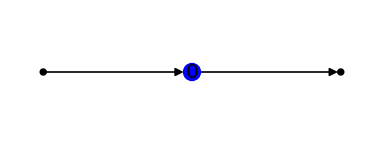

In [2]:
def create_neuron(
        weight=1.,
        leakage_factor=1,
        leakage_period=10,
        theta=0
):
    neuron = create_SCTN()
    neuron.synapses_weights = np.array([weight])
    neuron.leakage_factor = leakage_factor
    neuron.leakage_period = leakage_period
    neuron.theta = theta
    neuron.threshold_pulse = 500
    neuron.activation_function = BINARY
    return neuron

clk_freq = int(1.536 * (10 ** 6) * 2)
network = SpikingNetwork(clk_freq=clk_freq)
network.add_layer(SCTNLayer([create_neuron()]), True)

plot_network(network)

## Plot Decay of membrane

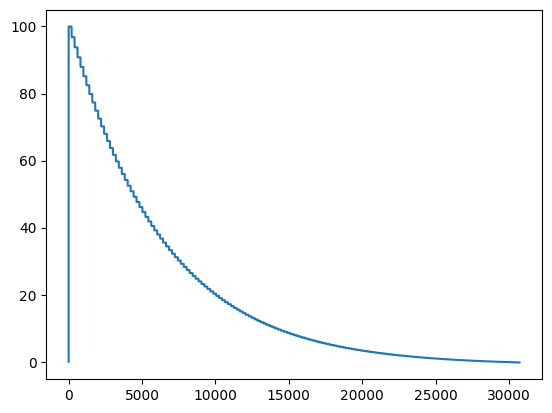

In [3]:
clk_freq = int(1.536 * (10 ** 6) * 2)
network = SpikingNetwork(clk_freq=clk_freq)
neuron = create_neuron(
    weight=25.,
    leakage_factor=5,
    leakage_period=200,
    theta=-.4e-4
)
neuron.membrane_sample_max_window = np.zeros(1).astype('float32')

network.add_layer(SCTNLayer([neuron]), True)
network.log_membrane_potential(0)

time_to_decay = 10e-3
time_to_decay = int(clk_freq * time_to_decay)
spikes = np.zeros(time_to_decay)
spikes[1] = 1
network.input_full_data_spikes(spikes)
plt.plot(network.neurons[0].membrane_potential_graph())

## Add new neurons to network

Plot initialized network.


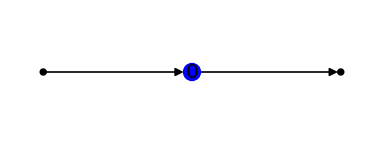

Manually add neuron to layer 0.


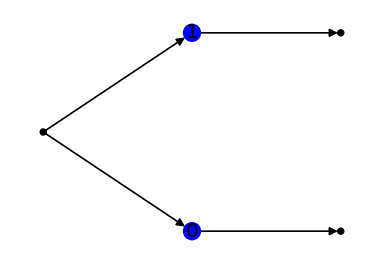

Manually add layer to see if neuron 1 is getting connected.


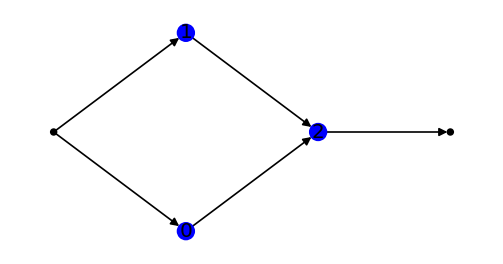

Manually add neuron to layer 1 to see if neuron 1 is getting connected too.


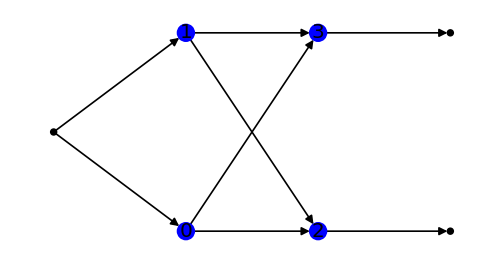

make the 2 last neurons be similar, it should be merged into 1


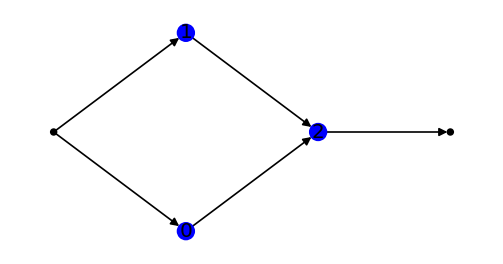

In [4]:
network = SpikingNetwork(clk_freq=clk_freq)

network.add_layer(SCTNLayer([create_neuron()]))
print('Plot initialized network.')
plot_network(network)

network.add_neuron(create_neuron(), 0)
print('Manually add neuron to layer 0.')
plot_network(network)

network.add_layer(SCTNLayer([create_neuron()]))
print('Manually add layer to see if neuron 1 is getting connected.')
plot_network(network)

network.add_neuron(create_neuron(), 1)
print('Manually add neuron to layer 1 to see if neuron 1 is getting connected too.')
plot_network(network)

print('make the 2 last neurons be similar, it should be merged into 1')
network.layers_neurons[0].neurons[0].synapses_weights = np.array([10.])
network.layers_neurons[0].neurons[1].synapses_weights = np.array([15.])
network.layers_neurons[-1].neurons[0].synapses_weights = np.array([1., 2.])
network.layers_neurons[-1].neurons[1].synapses_weights = np.array([1., 2.])
network.remove_irrelevant_neurons()
plot_network(network)
